In [3]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *

In [4]:
dfepitope = pd.read_csv('/home/amayer/data/peptidome/allhuman-iedb-epitopes.csv', header=1, usecols=(2, 9, 14))
dfepitope = dfepitope.fillna('')

In [5]:
dfepitope = load_iedb_tcellepitopes(only_standard_amino_acids=True, human_only=True)

In [6]:
epi = dfepitope[('Epitope', 'Description')]

In [15]:
dfepitope.columns

MultiIndex(levels=[['1st in vivo Process', '2nd in vivo Process', 'Adoptive Transfer', 'Antigen Presenting Cells', 'Assay', 'Assay Antigen', 'Assay Comments', 'Effector Cells', 'Epitope', 'Host', 'Immunization Comments', 'In Vitro Process', 'MHC', 'Reference', 'Related Object', 'TCR'], ['APC Cell Tissue Type IRI', 'APC Cell Type IRI', 'Adoptive Transfer Comments', 'Adoptive Transfer Flag', 'Allele Evidence Code', 'Allele IRI', 'Allele Name', 'Antigen Description', 'Antigen Epitope Relation', 'Antigen IRI', 'Antigen Name', 'Antigen Object Type', 'Antigen Organism IRI', 'Antigen Organism Name', 'Antigen Source Molecule IRI', 'Antigen Source Molecule Name', 'Assay Comments', 'Assay Group', 'Assay IRI', 'Assay Type IRI', 'Assayed TCR Molecule Name', 'Authors', 'Cell Culture Conditions', 'Cell Tissue Type', 'Cell Type', 'Class', 'Date', 'Description', 'Disease IRI', 'Disease Stage', 'Disease State', 'Effector Cell Tissue Type IRI', 'Effector Cell Type IRI', 'Ending Position', 'Epitope Comme

In [11]:
dfepitope['Epitope', 'Parent Species'].value_counts()

Mycobacterium tuberculosis            27327
Vaccinia virus                        22916
Blattella germanica                   17120
Homo sapiens                          16583
Hepacivirus C                         12775
Phleum pratense                       12763
Burkholderia pseudomallei             10286
Dengue virus                           6337
Human betaherpesvirus 5                5519
Human gammaherpesvirus 4               4663
Influenza A virus                      4630
Dermatophagoides                       4332
Human betaherpesvirus 6B               3995
Plasmodium falciparum                  2851
Human alphaherpesvirus 2               2689
Mus musculus                           2592
Clostridium tetani                     1819
Mycolicibacterium gilvum               1566
Mycobacterium leprae                   1488
Hepatitis B virus                      1435
Alphapapillomavirus 9                  1412
Cryptomeria japonica                   1379
Dermatophagoides pteronyssinus  

In [8]:
k = 1
dfhuman = counter_to_df(count_kmers_proteome(human, k))
dfmouse = counter_to_df(count_kmers_proteome(mouse, k))
#epi = list(dfepitope['Description'])
dfiedb = counter_to_df(count_kmers_iterable(epi, k))

In [9]:
len(epi), 20**k

(212825, 20)

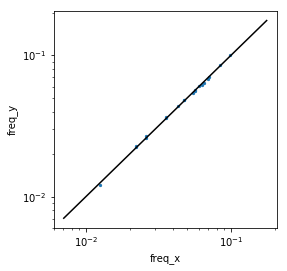

In [23]:
dfm = dfhuman.merge(dfmouse, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
x = np.logspace(np.log10(dfm['freq_x'].min())-0.25, np.log10(dfm['freq_x'].max())+0.25)
plt.plot(x, x, 'k')
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax, s=5)
#plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
#ax.set_xlim(2e-7, 5e-4)
#ax.set_ylim(2e-7, 5e-4)

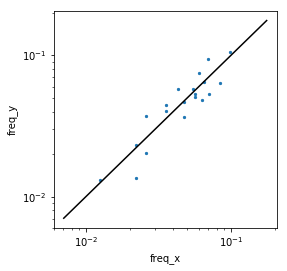

In [24]:
dfm = dfhuman.merge(dfiedb, on='seq')
fig, ax = plt.subplots(figsize=(4, 4))
x = np.logspace(np.log10(dfm['freq_x'].min())-0.25, np.log10(dfm['freq_x'].max())+0.25)
plt.plot(x, x, 'k')
dfm.plot('freq_x', 'freq_y', kind='scatter', logx=True, logy=True, ax=ax, s=5)
#ax.set_xlim(2e-7, 5e-3)
#ax.set_ylim(2e-7, 5e-3)

In [26]:
dfm['fold'] = dfm['freq_y']/dfm['freq_x']

(SpearmanrResult(correlation=-0.11428571428571428, pvalue=0.6313917305184382),
 array([[ 1.        , -0.05193285],
        [-0.05193285,  1.        ]]))

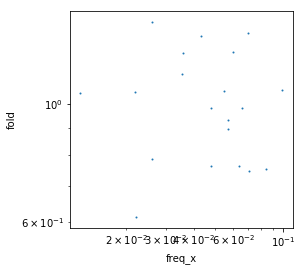

In [27]:
fig, ax = plt.subplots(figsize=(4, 4))
dfm.plot('freq_x', 'fold', kind='scatter', logx=True, logy=True, ax=ax, s=1)
#plt.plot(np.logspace(-6, -2), np.logspace(-6, -2), 'k')
#ax.set_xlim(2e-7, 5e-4)
#ax.set_ylim(2e-7, 5e-4)
scipy.stats.spearmanr(dfm['freq_x'], dfm['fold']), np.corrcoef(np.log(dfm['freq_x']), np.log(dfm['fold']))

In [28]:
dfm.sort_values('fold')

,seq,freq_x,freq_y,fold
19,C,0.022215,0.013627,0.613414
7,E,0.070695,0.052989,0.749538
1,S,0.084211,0.063447,0.753426
6,Q,0.047785,0.036468,0.763162
3,P,0.063484,0.048540,0.764594
16,H,0.026059,0.020524,0.787619
8,K,0.056720,0.050939,0.898069
2,R,0.056725,0.052865,0.931951
5,D,0.047732,0.046809,0.980671
11,G,0.065730,0.064461,0.980689


NameError: name 'load_iedb_bcellepitopes' is not defined